Project 1 Overview

Saturday Tasks
- Clean the data set
- Put data set into a data frame
- Do a binding of the data set by price points
    - $9.99 >
    - $10 - $19.99
    - $20 - $29.99
    - $30 - $39.99
    - $40 - $49.99
    - $50 - $59.99
    - $60 - $69.99
    - $70 - $79.99
    - $80 - $89.99
    - $90 - $99.99
    - > $100
- Focus only on wines that have a price point of $100 or less for the general analysis.


In [3]:
#Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import json
from api_keys import gkey
from pprint import pprint
import gmaps.datasets
import os
import requests
import json
#import pycountry



In [4]:
gmaps.configure(gkey)

In [5]:
# Wine Study Files
wine_data = "Resources/white-wine-price-rating.csv"

In [6]:
wine_data = pd.read_csv(wine_data)
wine_data.head()

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351


In [7]:
wine_data.count()

FullName                   4594
Winery                     4594
WineName                   4594
Year                       4594
Region                     4217
RegionalVariety            4217
VintageRating              4594
VintageRatingCount         4594
WineRating                 4594
WineRatingCount            4594
VintagePrice               4594
WinePrice                  4594
VintageRatingPriceRatio    4594
WineRatingPriceRatio       4594
dtype: int64

In [8]:
#Dropping lines with incomplete information.
wine_data_2 = wine_data.dropna(how="any")
wine_data_2.count()

FullName                   4217
Winery                     4217
WineName                   4217
Year                       4217
Region                     4217
RegionalVariety            4217
VintageRating              4217
VintageRatingCount         4217
WineRating                 4217
WineRatingCount            4217
VintagePrice               4217
WinePrice                  4217
VintageRatingPriceRatio    4217
WineRatingPriceRatio       4217
dtype: int64

In [9]:
#Removed Duplicates
wine_data_nodupes_df= wine_data_2.drop_duplicates(subset=['FullName'])
wine_data_nodupes_df.count()

FullName                   4216
Winery                     4216
WineName                   4216
Year                       4216
Region                     4216
RegionalVariety            4216
VintageRating              4216
VintageRatingCount         4216
WineRating                 4216
WineRatingCount            4216
VintagePrice               4216
WinePrice                  4216
VintageRatingPriceRatio    4216
WineRatingPriceRatio       4216
dtype: int64

In [12]:
wine_data_nodupes_df["Lat"]= ""
wine_data_nodupes_df["Lon"]= ""
wine_data_nodupes_df["Address"]= ""
wine_data_nodupes_df["Country"]= ""
wine_data_nodupes_df



C:\Users\Maher\anaconda3\envs\bcs\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Maher\anaconda3\envs\bcs\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Maher\anaconda3\envs\bcs\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio,Lat,Lon,Address,Country
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827,,,,
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765,,,,
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268,,,,
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327,,,,
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,Bachelet-Monnot Maranges 1er Cru 'La Fussière'...,Bachelet-Monnot,Maranges 1er Cru 'La Fussière' Blanc,2015,Burgundy,Côte de Beaune White,4.0,25,4.1,134,28.450,28.450,0.140598,0.144112,,,,
4588,Allimant-Laugner Pinot Gris 2016,Allimant-Laugner,Pinot Gris,2016,Alsace,Pinot Gris,4.0,25,3.7,137,20.700,20.700,0.193237,0.178744,,,,
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996,,,,
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685,,,,


In [13]:
wine_data_nodupes_df.nunique()

FullName                   4216
Winery                     1081
WineName                   1716
Year                         33
Region                       32
RegionalVariety              31
VintageRating                11
VintageRatingCount          537
WineRating                   13
WineRatingCount            1237
VintagePrice               1888
WinePrice                  1888
VintageRatingPriceRatio    2917
WineRatingPriceRatio       2800
Lat                           1
Lon                           1
Address                       1
Country                       1
dtype: int64

In [14]:
wine_data_regions_nodupes_df= wine_data_nodupes_df.drop_duplicates(subset=['Region'])
wine_data_regions_nodupes_df

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio,Lat,Lon,Address,Country
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827,,,,
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268,,,,
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327,,,,
6,Keller G-Max Riesling 2009,Keller,G-Max Riesling,2009,German,Riesling,4.8,37,4.7,209,2420.000,2420.000,0.001983,0.001942,,,,
7,Château Haut-Brion Pessac-Léognan Blanc (Grand...,Château Haut-Brion,Pessac-Léognan Blanc (Grand Cru Classé de Graves),2005,Bordeaux,White,4.8,39,4.5,820,864.000,864.000,0.005556,0.005208,,,,
15,F.X. Pichler Unendlich Riesling 2017,F.X. Pichler,Unendlich Riesling,2017,Austrian,Riesling,4.9,49,4.7,489,207.170,207.170,0.023652,0.022687,,,,
17,Marqués de Murrieta Castillo Ygay Gran Reserva...,Marqués de Murrieta,Castillo Ygay Gran Reserva Especial Blanco,1986,Spanish,Rioja White,4.7,277,4.6,1341,599.000,599.000,0.007846,0.007679,,,,
18,La Grange des Pères Vin de Pays de l'Hérault B...,La Grange des Pères,Vin de Pays de l'Hérault Blanc,2014,Languedoc-Roussillon,White,4.5,90,4.5,632,223.000,223.000,0.020179,0.020179,,,,
24,Ornellaia Toscana Bianco 2015,Ornellaia,Toscana Bianco,2015,Central Italy,White,4.2,57,4.4,279,226.000,226.000,0.018584,0.019469,,,,
30,Quintarelli Giuseppe Veneto Amabile del Cere P...,Quintarelli Giuseppe,Veneto Amabile del Cere Passito Bianco,2003,Northern Italy,White,4.7,66,4.6,184,377.400,377.400,0.012454,0.012189,,,,


In [17]:
# set up a parameters dictionary
#Marcassin
#pseudocode:
#for index, row of wine_data



# base url
base_url = "https://maps.googleapis.com/maps/api/place/textsearch/json"


for index, row in wine_data_regions_nodupes_df.iterrows():
    winery = row['Winery']    
    #region = row['Region']
    params = {
    "query": winery + "+winery",
    "key": gkey
    }
    response = requests.get(base_url, params=params)

    #print(params)  
    winery_data = response.json()
    status = winery_data["status"]
    if status == "OK":
    #print(status)
        lat = winery_data["results"][0]["geometry"]["location"]["lat"]
        lon = winery_data["results"][0]["geometry"]["location"]["lng"]
        address = winery_data["results"][0]["formatted_address"]
        #print(lat)
        #print(lon)
        #print(address)
        #print(json.dumps(winery_data, indent=4, sort_keys=True))
        #hotel = hotels_data["results"][0]["name"]
        wine_data_regions_nodupes_df.loc[index, 'Lat'] = lat
        wine_data_regions_nodupes_df.loc[index, 'Lon'] = lon
        wine_data_regions_nodupes_df.loc[index, 'Address'] = address
    else:
        print(status)
wine_data_regions_nodupes_df

ZERO_RESULTS


C:\Users\Maher\anaconda3\envs\bcs\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


ZERO_RESULTS
ZERO_RESULTS
ZERO_RESULTS
ZERO_RESULTS
ZERO_RESULTS
ZERO_RESULTS
ZERO_RESULTS
ZERO_RESULTS
ZERO_RESULTS


,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio,Lat,Lon,Address,Country
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827,NaN,,,
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268,38.528475,-122.799,"7331 Conde Ln, Windsor, CA 95492, United States",
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327,NaN,,,
6,Keller G-Max Riesling 2009,Keller,G-Max Riesling,2009,German,Riesling,4.8,37,4.7,209,2420.000,2420.000,0.001983,0.001942,38.201025,-122.534,"5875 Lakeville Hwy, Petaluma, CA 94954, United...",
7,Château Haut-Brion Pessac-Léognan Blanc (Grand...,Château Haut-Brion,Pessac-Léognan Blanc (Grand Cru Classé de Graves),2005,Bordeaux,White,4.8,39,4.5,820,864.000,864.000,0.005556,0.005208,NaN,,,
15,F.X. Pichler Unendlich Riesling 2017,F.X. Pichler,Unendlich Riesling,2017,Austrian,Riesling,4.9,49,4.7,489,207.170,207.170,0.023652,0.022687,48.387776,15.5306,"Oberloiben 57, 3601 Dürnstein, Austria",
17,Marqués de Murrieta Castillo Ygay Gran Reserva...,Marqués de Murrieta,Castillo Ygay Gran Reserva Especial Blanco,1986,Spanish,Rioja White,4.7,277,4.6,1341,599.000,599.000,0.007846,0.007679,NaN,,,
18,La Grange des Pères Vin de Pays de l'Hérault B...,La Grange des Pères,Vin de Pays de l'Hérault Blanc,2014,Languedoc-Roussillon,White,4.5,90,4.5,632,223.000,223.000,0.020179,0.020179,43.672507,3.57977,"D32E2, 34150 Aniane, France",
24,Ornellaia Toscana Bianco 2015,Ornellaia,Toscana Bianco,2015,Central Italy,White,4.2,57,4.4,279,226.000,226.000,0.018584,0.019469,NaN,,,
30,Quintarelli Giuseppe Veneto Amabile del Cere P...,Quintarelli Giuseppe,Veneto Amabile del Cere Passito Bianco,2003,Northern Italy,White,4.7,66,4.6,184,377.400,377.400,0.012454,0.012189,45.519190,10.9466,"Via Cerè, 1, 37024 Negrar VR, Italy",


In [18]:

#wine_data_na_df.head()
wine_data_regions_nodupes_df['Lat'].replace('', np.nan, inplace=True)
wine_data_na_df = wine_data_regions_nodupes_df.dropna()


C:\Users\Maher\anaconda3\envs\bcs\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
fig = gmaps.figure()
locations = wine_data_na_df[["Lat", "Lon"]]
print(locations)
# Create heat layer
winery_region_location_map = gmaps.marker_layer(locations)

# Add layer
fig.add_layer(winery_region_location_map)

# Display figure
fig

            Lat        Lon
2     38.528475   -122.799
6     38.201025   -122.534
15    48.387776    15.5306
18    43.672507    3.57977
30    45.519190    10.9466
32    38.436564   -122.247
34    48.194905    7.32602
205   47.214244 -0.0706045
288  -34.920878     138.68
355   41.039947    9.37669
790   41.153762   -7.12045
805  -33.167836   -68.9045
839   41.010396   -95.7026
857   44.707431     8.7819
953   45.272473   -123.016
1046 -41.248579    172.992
1215  42.091053    -8.3203
1281  47.160903    4.95471
1749  47.200905   -1.31441
1831  36.442549    25.4377
2087  43.955201   -77.4456
3934  40.450970    22.9249


Figure(layout=FigureLayout(height='420px'))

In [48]:
for index, row in wine_data_na_df.iterrows():
    address = row['Address']
    asplit = address.split(",") 
    country = asplit[-1]
    
    print (country)
    

 United States
 United States
 Austria
 France
 Italy
 United States
 France
 France
 Australia
 Italy
 Portugal
 Argentina
 United States
 Italy
 United States
 New Zealand
 Portugal
 France
 France
 Greece
 Canada
 Greece


In [49]:
wine_data_regions_nodupes_df.loc[index, 'Country'] = country
wine_data_regions_nodupes_df

C:\Users\Maher\anaconda3\envs\bcs\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio,Lat,Lon,Address,Country
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827,NaN,,,
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268,38.528475,-122.799,"7331 Conde Ln, Windsor, CA 95492, United States",United States
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327,NaN,,,
6,Keller G-Max Riesling 2009,Keller,G-Max Riesling,2009,German,Riesling,4.8,37,4.7,209,2420.000,2420.000,0.001983,0.001942,38.201025,-122.534,"5875 Lakeville Hwy, Petaluma, CA 94954, United...",United States
7,Château Haut-Brion Pessac-Léognan Blanc (Grand...,Château Haut-Brion,Pessac-Léognan Blanc (Grand Cru Classé de Graves),2005,Bordeaux,White,4.8,39,4.5,820,864.000,864.000,0.005556,0.005208,NaN,,,
15,F.X. Pichler Unendlich Riesling 2017,F.X. Pichler,Unendlich Riesling,2017,Austrian,Riesling,4.9,49,4.7,489,207.170,207.170,0.023652,0.022687,48.387776,15.5306,"Oberloiben 57, 3601 Dürnstein, Austria",Austria
17,Marqués de Murrieta Castillo Ygay Gran Reserva...,Marqués de Murrieta,Castillo Ygay Gran Reserva Especial Blanco,1986,Spanish,Rioja White,4.7,277,4.6,1341,599.000,599.000,0.007846,0.007679,NaN,,,
18,La Grange des Pères Vin de Pays de l'Hérault B...,La Grange des Pères,Vin de Pays de l'Hérault Blanc,2014,Languedoc-Roussillon,White,4.5,90,4.5,632,223.000,223.000,0.020179,0.020179,43.672507,3.57977,"D32E2, 34150 Aniane, France",France
24,Ornellaia Toscana Bianco 2015,Ornellaia,Toscana Bianco,2015,Central Italy,White,4.2,57,4.4,279,226.000,226.000,0.018584,0.019469,NaN,,,
30,Quintarelli Giuseppe Veneto Amabile del Cere P...,Quintarelli Giuseppe,Veneto Amabile del Cere Passito Bianco,2003,Northern Italy,White,4.7,66,4.6,184,377.400,377.400,0.012454,0.012189,45.519190,10.9466,"Via Cerè, 1, 37024 Negrar VR, Italy",Italy


In [21]:
#Age Demographics - Binned into bins of 4 years.  
#bins = [0, 10, 14, 19, 24, 29, 34, 39, 45]

# Create the names for the five bins
#age_groups = ["<10", "11-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

#purchase_file_df["Age Summary"] = pd.cut(purchase_file_df["Age"], bins, labels=age_groups, include_lowest=True)
#purchase_file_df

#Wine pricing - binning  at $10 increments up to $100.    
bins = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24]


#Wine pricing - binning  at $10 increments up to $100.    
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 5000]

# Create the names for the five bins
wine_pricing = ["<$9.99", "$10-$19.99", "$20-$29.99", "$30-$39.99", "$40-$49.99", "$50-$59.99", "$60-$69.99", "$70-$79.99", "$80-$89.99", "$90-$99.99", "$100<"]

wine_data_nodupes_df

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio,Lat,Lon,Address,Country
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827,,,,
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765,,,,
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268,,,,
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327,,,,
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,Bachelet-Monnot Maranges 1er Cru 'La Fussière'...,Bachelet-Monnot,Maranges 1er Cru 'La Fussière' Blanc,2015,Burgundy,Côte de Beaune White,4.0,25,4.1,134,28.450,28.450,0.140598,0.144112,,,,
4588,Allimant-Laugner Pinot Gris 2016,Allimant-Laugner,Pinot Gris,2016,Alsace,Pinot Gris,4.0,25,3.7,137,20.700,20.700,0.193237,0.178744,,,,
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996,,,,
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685,,,,


In [22]:
# Removing records with price >$100
wine_under_100_df = wine_data_nodupes_df[wine_data_nodupes_df['WinePrice'] < 100]
#wine_under_100_df

In [23]:
#wine_under_100_rates_df = wine_under_100_df[wine_under_100_df['WineRating'] >4.0]
#wine_under_100_rates_df

In [24]:
wine_under_100_df.describe()

,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
count,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000
mean,4.165650,142.654752,4.112554,1271.537344,43.043981,43.043981,0.115708,0.113977
std,0.134855,260.087852,0.140987,2162.933513,19.739198,19.739198,0.045180,0.043940
min,3.900000,25.000000,3.500000,28.000000,15.020000,15.020000,0.040076,0.041408
25%,4.100000,41.000000,4.000000,358.000000,27.280000,27.280000,0.076378,0.076268
50%,4.200000,73.000000,4.100000,685.000000,37.390000,37.390000,0.111702,0.110795
75%,4.300000,145.000000,4.200000,1417.000000,55.000000,55.000000,0.150128,0.148148
max,4.700000,6883.000000,4.600000,37863.000000,99.980000,99.980000,0.272969,0.259654


In [25]:
#Price Analysis by Region
var_stat= wine_under_100_df.groupby('Region')["WinePrice"].var()
med_stat= wine_under_100_df.groupby('Region')["WinePrice"].median()
std_stat= wine_under_100_df.groupby('Region')["WinePrice"].std()
men_stat= wine_under_100_df.groupby('Region')["WinePrice"].mean()
sem_stat= wine_under_100_df.groupby('Region')["WinePrice"].sem()

wine_region_price_stats_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
#wine_region_price_stats_df

In [26]:
#Ratings Analysis by Region
var_stat= wine_under_100_df.groupby('Region')["WineRating"].var()
med_stat= wine_under_100_df.groupby('Region')["WineRating"].median()
std_stat= wine_under_100_df.groupby('Region')["WineRating"].std()
men_stat= wine_under_100_df.groupby('Region')["WineRating"].mean()
sem_stat= wine_under_100_df.groupby('Region')["WineRating"].sem()

wine_ratings_region_stats_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
#wine_ratings_region_stats_df

In [27]:
#Wine Ratings Ratio Analysis by Region
var_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].var()
med_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].median()
std_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].std()
men_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].mean()
sem_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].sem()

wine_ratingsratio_region_stats_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
wine_ratingsratio_region_stats_df

,Variance,Median,Mean,Standard Dev,SEM
Region,,,,,
Chilean,NaN,0.047964,0.047964,NaN,NaN
Alsace,0.001569,0.109159,0.109518,0.039606,0.002994
Argentinian,0.002320,0.074176,0.100156,0.048166,0.009270
Australian,0.001560,0.110291,0.108654,0.039500,0.004211
Austrian,0.001793,0.117330,0.118132,0.042349,0.006113
Bordeaux,0.002050,0.066397,0.089047,0.045274,0.005030
Burgundy,0.001629,0.091010,0.099609,0.040363,0.001164
Californian,0.001338,0.093182,0.093404,0.036580,0.003038
Canadian,0.000214,0.126091,0.128275,0.014615,0.008438


In [28]:
highly_rate_ratio_regions = wine_ratingsratio_region_stats_df[wine_ratingsratio_region_stats_df['Mean'] > 0.135]
highly_rate_ratio_regions

,Variance,Median,Mean,Standard Dev,SEM
Region,,,,,
Greek,NaN,0.195331,0.195331,NaN,NaN
Greek Santorini,0.000895,0.135542,0.138568,0.029909,0.006688
Italian,0.001564,0.150943,0.145732,0.039546,0.009591
Languedoc-Roussillon,0.001671,0.141693,0.143745,0.040872,0.006545
Loire Muscadet,0.000095,0.144928,0.141876,0.009731,0.004352
New Zealand,0.001200,0.145794,0.147866,0.034642,0.003948
Northern Portugal,0.001567,0.139811,0.144673,0.039589,0.004698
Portuguese,0.002507,0.169220,0.155554,0.050070,0.011802
South African,0.001585,0.154775,0.146413,0.039817,0.003506


Text(0, 0.5, 'Wine Ratings')

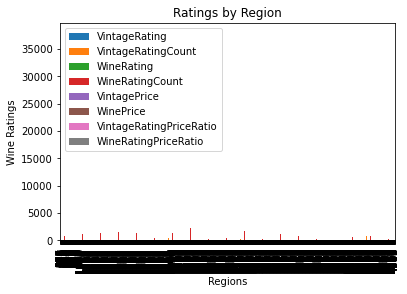

In [29]:

Ratings_wines_by_region_df = wine_under_100_df.groupby("Region").mean()


#plt.bar(x_axis, users, color='r', alpha=0.5, align="center"
wine_under_100_df.plot(kind="bar")
plt.title("Ratings by Region")
plt.xlabel("Regions")
plt.ylabel("Wine Ratings")
#plt.show()

Text(0, 0.5, 'Average Price')

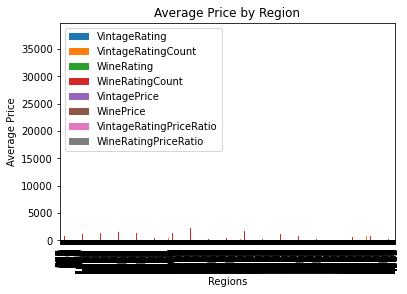

In [30]:
mean_price_wines_by_region_df = wine_under_100_df.groupby("Region")["WinePrice"].mean()


#plt.bar(x_axis, users, color='r', alpha=0.5, align="center"
wine_under_100_df.plot(kind="bar")
plt.title("Average Price by Region")
plt.xlabel("Regions")
plt.ylabel("Average Price")
#plt.show()

KeyError: 'WineRegions'

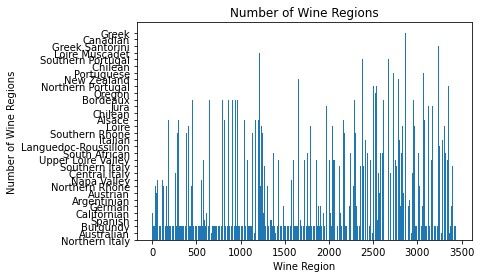

In [31]:
reset_wine_df= wine_under_100_df.reset_index()
x_data = range(len(reset_wine_df["Region"]))
y_data = reset_wine_df["Region"]
plt.bar(x_data, y_data)
plt.title("Number of Wine Regions")
plt.xlabel("Wine Region")
plt.ylabel("Number of Wine Regions")
plt.xticks(x_data, (reset_wine_df["WineRegions"]), rotation='vertical')
plt.show()

In [ ]:
overall_wine_stats_df = pd.merge(wine_ratings_region_stats_df, wine_region_price_stats_df,
                                 how='outer', on='Region')

overall_wine_stats_df

In [ ]:
overall_wine_stats_df = overall_wine_stats_df.rename(columns={"Variance_x": "Ratings Variance", "Median_x": "Ratings Median", "Mean_x": "Ratings Mean",
                                      "Standard Dev_x": "Ratings Stand Dev", "SEM_x": "Ratings SEM"})

overall_wine_stats_df = overall_wine_stats_df.rename(columns={"Variance_y": "Price Variance", "Median_y": "Price Median", "Mean_y": "Price Mean",
                                      "Standard Dev_y": "Price Stand Dev", "SEM_y": "Price SEM"})

overall_wine_stats_df

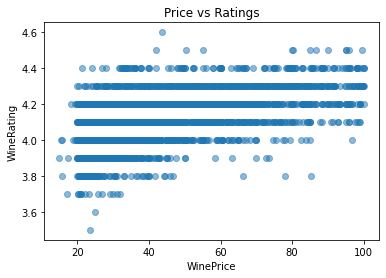

In [32]:
plt.title("Price vs Ratings")
plt.xlabel("WinePrice")
plt.ylabel("WineRating")
plt.scatter(wine_under_100_df["WinePrice"], wine_under_100_df["WineRating"], alpha = 0.5)


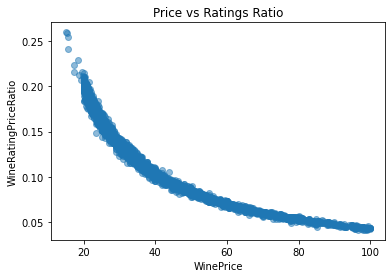

In [33]:
plt.title("Price vs Ratings Ratio")
plt.xlabel("WinePrice")
plt.ylabel("WineRatingPriceRatio")
plt.scatter(wine_under_100_df["WinePrice"], wine_under_100_df["WineRatingPriceRatio"], alpha = 0.5)


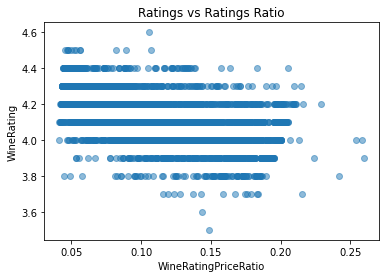

In [44]:
plt.title("Ratings vs Ratings Ratio")
plt.xlabel("WineRatingPriceRatio")
plt.ylabel("WineRating")
plt.scatter(wine_under_100_df["WineRatingPriceRatio"], wine_under_100_df["WineRating"], alpha = 0.5)


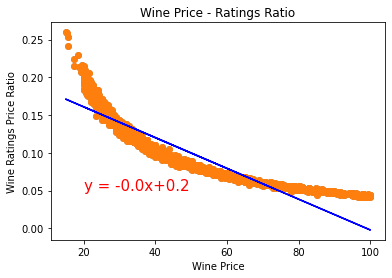

In [45]:
plt.scatter(wine_under_100_df["WinePrice"], wine_under_100_df["WineRatingPriceRatio"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(wine_under_100_df["WinePrice"],wine_under_100_df["WineRatingPriceRatio"])
regress_values = (wine_under_100_df["WinePrice"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(wine_under_100_df["WinePrice"],wine_under_100_df["WineRatingPriceRatio"])
plt.plot(wine_under_100_df["WinePrice"],regress_values,"b-")
plt.annotate(line_eq,(20,0.05),fontsize=15,color="red")
plt.title("Wine Price - Ratings Ratio")
plt.xlabel('Wine Price')
plt.ylabel('Wine Ratings Price Ratio')
#plt.savefig('northhem_maxtemp_lat.png')
plt.show()
